<a href="https://colab.research.google.com/github/juan-medinaf/Datathon-1_CHL5230_Group4/blob/main/Datathon4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch

In [ ]:
import pandas as pd
import io
import seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from scipy.stats import chi2
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# importing PyTorch library as 't' for convenience
import torch as t
# importing other necessary libraries
import numpy as np
from torch.nn.functional import sigmoid, relu, tanh
from torch.optim import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader

# importing PyTorch modules for building neural networks
from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/datathon4.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [ ]:
# Randomly sample 70% of the data for training
train_data = df.sample(frac = .7, random_state=10)

# Use the remaining 30% for testing
test_data = df.drop(train_data.index)

In [ ]:
df.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age',
       'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=186)

In [ ]:
# checking the data types
pd.options.display.max_rows = 200
df.dtypes

encounter_id                       int64
patient_id                         int64
hospital_id                        int64
hospital_death                     int64
age                              float64
bmi                              float64
elective_surgery                   int64
ethnicity                         object
gender                            object
height                           float64
hospital_admit_source             object
icu_admit_source                  object
icu_id                             int64
icu_stay_type                     object
icu_type                          object
pre_icu_los_days                 float64
readmission_status                 int64
weight                           float64
albumin_apache                   float64
apache_2_diagnosis               float64
apache_3j_diagnosis              float64
apache_post_operative              int64
arf_apache                       float64
bilirubin_apache                 float64
bun_apache      

In [ ]:
# Check for missing values in each column
print(df.isnull().sum())

encounter_id                         0
patient_id                           0
hospital_id                          0
hospital_death                       0
age                               4228
bmi                               3429
elective_surgery                     0
ethnicity                         1395
gender                              25
height                            1334
hospital_admit_source            21409
icu_admit_source                   112
icu_id                               0
icu_stay_type                        0
icu_type                             0
pre_icu_los_days                     0
readmission_status                   0
weight                            2720
albumin_apache                   54379
apache_2_diagnosis                1662
apache_3j_diagnosis               1101
apache_post_operative                0
arf_apache                         715
bilirubin_apache                 58134
bun_apache                       19262
creatinine_apache        

Delete all unncessary features such as ratio, id and location, we just want to keep basic bioinformation in our cleaned dataset.

encounter_id, patient_id, hospital_id, hospital_admit_source, icu_admit_source, icu_id, icu_stay_type, icu_type, pre_icu_los_days, readmission_status(all zero), apache_2_diagnosis, apache_3j_diagnosis, apache_4a_hospital_death_prob, apache_4a_icu_death_prob

In [ ]:
# delet all columns:
df.drop(columns=['encounter_id', 'patient_id', 'hospital_id',
                 'hospital_admit_source', 'icu_admit_source', 'icu_id',
                 'icu_stay_type', 'icu_type', 'pre_icu_los_days',
                 'readmission_status', 'apache_2_diagnosis',
                 'apache_3j_diagnosis', 'apache_4a_hospital_death_prob',
                 'apache_4a_icu_death_prob'], inplace=True)

In [ ]:
# Check for missing values in each column
df.dtypes

hospital_death                   int64
age                            float64
bmi                            float64
elective_surgery                 int64
ethnicity                       object
gender                          object
height                         float64
weight                         float64
albumin_apache                 float64
apache_post_operative            int64
arf_apache                     float64
bilirubin_apache               float64
bun_apache                     float64
creatinine_apache              float64
fio2_apache                    float64
gcs_eyes_apache                float64
gcs_motor_apache               float64
gcs_unable_apache              float64
gcs_verbal_apache              float64
glucose_apache                 float64
heart_rate_apache              float64
hematocrit_apache              float64
intubated_apache               float64
map_apache                     float64
paco2_apache                   float64
paco2_for_ph_apache      

In [ ]:
# ethnicity, gender, apache_3j_bodysystem,apache_2_bodysystem
# Dealing with categorical data missing values
df['ethnicity'].fillna('Other/Unknown', inplace=True)

# Replace categorical values with numerical equivalents
df['ethnicity'].replace({'African American' : 0,
                         'Asian' : 1,
                        'Caucasian' : 2,
                        'Hispanic' : 3,
                        'Native American' : 4,
                        'Other/Unknown' : 5}, inplace=True)

In [ ]:
# Check for missing values in each column
print(df['ethnicity'].isnull().sum())

0


In [ ]:
# double check the result
df['ethnicity'].unique()

array([2, 5, 3, 0, 1, 4])

In [ ]:
# Dealing with gender, only 25 missing values,
# there is no need to create a new category, we may just drop these 25
# objects since we get a large dataset.
df=df.dropna(subset=['gender'])

In [ ]:
# Replace categorical values with numerical equivalents
df['gender'].replace({'F' : 0,
                         'M' : 1}, inplace=True)

In [ ]:
print(df['gender'].isnull().sum())

0


In [ ]:
# Dealing with apache_3j_bodysystem
df['apache_3j_bodysystem'].fillna('Other/Unknown', inplace=True)

In [ ]:
df['apache_3j_bodysystem'].unique()

array(['Sepsis', 'Respiratory', 'Metabolic', 'Cardiovascular', 'Trauma',
       'Neurological', 'Gastrointestinal', 'Genitourinary',
       'Other/Unknown', 'Hematological', 'Musculoskeletal/Skin',
       'Gynecological'], dtype=object)

In [ ]:
# Replace categorical values with numerical equivalents
df['apache_3j_bodysystem'].replace({'Sepsis' : 0,
                        'Respiratory' : 1,
                        'Metabolic' : 2,
                        'Cardiovascular' : 3,
                        'Trauma' : 4,
                        'Neurological' : 5,
                        'Gastrointestinal' : 6 ,
                        'Genitourinary' : 7,
                        'Hematological' : 8,
                        'Musculoskeletal/Skin' : 9,
                        'Gynecological' : 10,
                        'Other/Unknown' : 11}, inplace=True)

In [ ]:
df['apache_3j_bodysystem'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7, 11,  8,  9, 10])

In [ ]:
# Dealing with apache_2_bodysystem
df['apache_2_bodysystem'].fillna('Other/Unknown', inplace=True)

In [ ]:
df['apache_2_bodysystem'].unique()

array(['Cardiovascular', 'Respiratory', 'Metabolic', 'Trauma',
       'Neurologic', 'Gastrointestinal', 'Renal/Genitourinary',
       'Other/Unknown', 'Undefined diagnoses', 'Haematologic',
       'Undefined Diagnoses'], dtype=object)

In [ ]:
# Replace categorical values with numerical equivalents
# label the same disease with same # as in apache_2_bodysystem
df['apache_2_bodysystem'].replace({
                        'Respiratory' : 1,
                        'Metabolic' : 2,
                        'Cardiovascular' : 3,
                        'Trauma' : 4,
                        'Gastrointestinal' : 6 ,
                        'Undefined Diagnoses' : 11,
                        'Undefined diagnoses' : 11,
                        'Other/Unknown' : 11,
                        'Neurologic' : 12,
                        'Renal/Genitourinary' : 13,
                        'Haematologic' : 14}, inplace=True)

In [ ]:
df['apache_2_bodysystem'].unique()

array([ 3,  1,  2,  4, 12,  6, 13, 11, 14])

Dealing with missing values that need to be filled in with zero:
arf_apache, gcs_unable_apache, intubated_apache, ventilated_apache,
aids, cirrhosis, diabetes_mellitus, hepatic_failure, immunosuppression,
leukemia, lymphoma, solid_tumor_with_metastasis

In [ ]:
fill_zero_para = ['arf_apache', 'gcs_unable_apache', 'intubated_apache',
                  'ventilated_apache', 'aids', 'cirrhosis',
                  'diabetes_mellitus', 'hepatic_failure',
                  'immunosuppression','leukemia', 'lymphoma',
                  'solid_tumor_with_metastasis']
df[fill_zero_para] = df[fill_zero_para].fillna(value=0)

In [ ]:
# Check for missing values in each column
print(df.isnull().sum())

hospital_death                     0
age                             4216
bmi                             3422
elective_surgery                   0
ethnicity                          0
gender                             0
height                          1328
weight                          2716
albumin_apache                 54361
apache_post_operative              0
arf_apache                         0
bilirubin_apache               58116
bun_apache                     19250
creatinine_apache              18841
fio2_apache                    70848
gcs_eyes_apache                 1898
gcs_motor_apache                1898
gcs_unable_apache                  0
gcs_verbal_apache               1898
glucose_apache                 11024
heart_rate_apache                877
hematocrit_apache              19865
intubated_apache                   0
map_apache                       993
paco2_apache                   70848
paco2_for_ph_apache            70848
pao2_apache                    70848
p

In [ ]:
df.head()

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,weight,albumin_apache,apache_post_operative,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.0,22.73,0,2,1,180.3,73.9,2.3,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,3
1,0,77.0,27.42,0,2,0,160.0,70.2,NaN,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1
2,0,25.0,31.95,0,2,0,172.7,95.3,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
3,0,81.0,22.64,1,2,0,165.1,61.7,NaN,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
4,0,19.0,NaN,0,2,1,188.0,NaN,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4


We can use their features' median value to fill in the rest missing value.

In [ ]:
# Randomly sample 70% of the data for training
train_data = df.sample(frac = .7, random_state=10)

# Use the remaining 30% for testing
test_data = df.drop(train_data.index)

In [ ]:
# Feature engineering and preprocessing on the training set
train_data.fillna(train_data.median(), inplace=True)
print(train_data.isnull().sum())

hospital_death                 0
age                            0
bmi                            0
elective_surgery               0
ethnicity                      0
gender                         0
height                         0
weight                         0
albumin_apache                 0
apache_post_operative          0
arf_apache                     0
bilirubin_apache               0
bun_apache                     0
creatinine_apache              0
fio2_apache                    0
gcs_eyes_apache                0
gcs_motor_apache               0
gcs_unable_apache              0
gcs_verbal_apache              0
glucose_apache                 0
heart_rate_apache              0
hematocrit_apache              0
intubated_apache               0
map_apache                     0
paco2_apache                   0
paco2_for_ph_apache            0
pao2_apache                    0
ph_apache                      0
resprate_apache                0
sodium_apache                  0
temp_apach

In [ ]:
# Feature engineering and preprocessing on the testing set
test_data.fillna(test_data.median(), inplace=True)
print(test_data.isnull().sum())

hospital_death                 0
age                            0
bmi                            0
elective_surgery               0
ethnicity                      0
gender                         0
height                         0
weight                         0
albumin_apache                 0
apache_post_operative          0
arf_apache                     0
bilirubin_apache               0
bun_apache                     0
creatinine_apache              0
fio2_apache                    0
gcs_eyes_apache                0
gcs_motor_apache               0
gcs_unable_apache              0
gcs_verbal_apache              0
glucose_apache                 0
heart_rate_apache              0
hematocrit_apache              0
intubated_apache               0
map_apache                     0
paco2_apache                   0
paco2_for_ph_apache            0
pao2_apache                    0
ph_apache                      0
resprate_apache                0
sodium_apache                  0
temp_apach

In [ ]:
train_data.dtypes

hospital_death                   int64
age                            float64
bmi                            float64
elective_surgery                 int64
ethnicity                        int64
gender                           int64
height                         float64
weight                         float64
albumin_apache                 float64
apache_post_operative            int64
arf_apache                     float64
bilirubin_apache               float64
bun_apache                     float64
creatinine_apache              float64
fio2_apache                    float64
gcs_eyes_apache                float64
gcs_motor_apache               float64
gcs_unable_apache              float64
gcs_verbal_apache              float64
glucose_apache                 float64
heart_rate_apache              float64
hematocrit_apache              float64
intubated_apache               float64
map_apache                     float64
paco2_apache                   float64
paco2_for_ph_apache      

In [ ]:
train_data.head()

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,weight,albumin_apache,apache_post_operative,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
25994,0,53.0,30.864198,0,2,1,180.0,100.0,3.2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
12866,0,73.0,19.870816,1,2,1,182.8,66.4,2.9,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
88816,0,47.0,39.700502,0,2,1,175.3,122.0,2.9,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
10633,0,67.0,36.390941,0,2,1,180.3,118.3,3.4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
82198,0,39.0,33.274623,0,2,0,165.1,90.7,2.9,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2


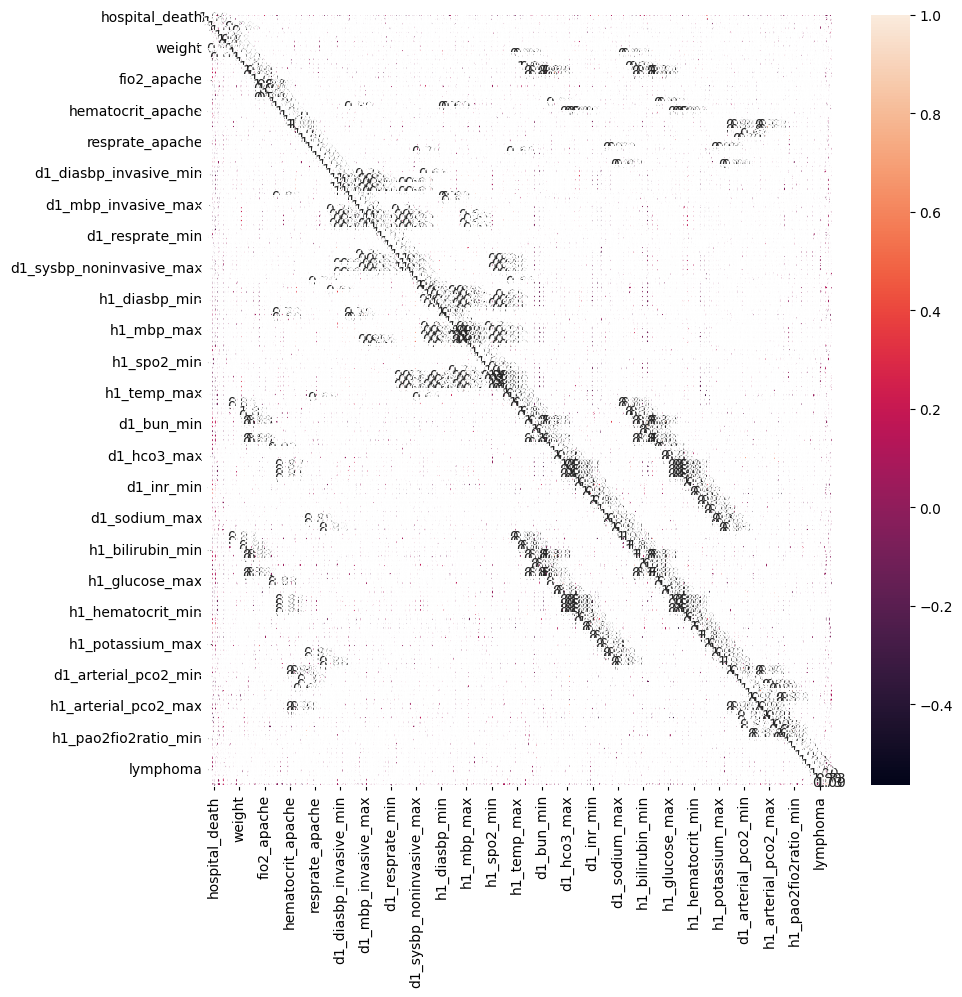

In [ ]:
# We want to check the correlation between 2 different features
correlation = df.corr()
seaborn.heatmap (correlation, annot = True, fmt=".2f")
plt.gcf().set_size_inches(10, 10)

In [ ]:
abs(correlation['hospital_death']) > 0.2

hospital_death                  True
age                            False
bmi                            False
elective_surgery               False
ethnicity                      False
gender                         False
height                         False
weight                         False
albumin_apache                 False
apache_post_operative          False
arf_apache                     False
bilirubin_apache               False
bun_apache                     False
creatinine_apache              False
fio2_apache                     True
gcs_eyes_apache                 True
gcs_motor_apache                True
gcs_unable_apache              False
gcs_verbal_apache               True
glucose_apache                 False
heart_rate_apache              False
hematocrit_apache              False
intubated_apache               False
map_apache                     False
paco2_apache                   False
paco2_for_ph_apache            False
pao2_apache                    False
p

Here, we only select the features have a relatively high correlationship with hospital_death.

In [ ]:
selected_features = ['hospital_death', 'fio2_apache', 'gcs_eyes_apache',
                    'gcs_motor_apache', 'gcs_verbal_apache', 'ph_apache',
                    'ventilated_apache', 'd1_mbp_invasive_min',
                    'd1_spo2_min', 'd1_sysbp_invasive_min', 'd1_sysbp_min',
                    'd1_sysbp_noninvasive_min', 'd1_temp_min', 'd1_albumin_min',
                    'd1_lactate_max', 'd1_lactate_min', 'h1_albumin_max', 'h1_albumin_min',
                    'h1_lactate_max', 'h1_lactate_min', 'd1_arterial_ph_min', 'h1_arterial_ph_max']
train_data = train_data[selected_features]

In [ ]:
test_data = test_data[selected_features]

Here, we choose SMOTE to deal with imbalance issue for our dataset.

In [ ]:
smote = SMOTE()
# Extract the 'DEATH_EVENT' column as the target variable for training and testing
Y_train = train_data['hospital_death'].to_numpy()
Y_test = test_data['hospital_death'].to_numpy()

# Extract the features (excluding 'DEATH_EVENT') for training and testing
X_train = train_data.drop('hospital_death', axis=1).to_numpy()
X_test = test_data.drop('hospital_death', axis=1).to_numpy()

X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [ ]:
# Standardize the features to have zero mean and unit variance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Define the number of neurons in the first and second hidden layers
hidden_units_layer_1 = 5
hidden_units_layer_2 = 5

# FIRST LAYER: Define weights and biases for the first layer
W1 = t.randn((21, hidden_units_layer_1), requires_grad=True)
B1 = t.zeros((1, hidden_units_layer_1), requires_grad=True)

# SECOND LAYER: Define weights and biases for the second layer
W2 = t.randn((hidden_units_layer_1, hidden_units_layer_2), requires_grad=True)
B2 = t.zeros((1, hidden_units_layer_2), requires_grad=True)

# THIRD LAYER: Define weights and biases for the output layer
W3 = t.randn((hidden_units_layer_2, 1), requires_grad=True)
B3 = t.zeros((1, 1), requires_grad=True)

In [ ]:
# Define the forward pass of the neural network
def forward(input):
    # First hidden layer with tanh activation
    out = tanh(input @ W1 + B1)

    # Second hidden layer with tanh activation
    out = tanh(out @ W2 + B2)

    # Output layer with sigmoid activation (since it's a binary classification problem)
    out = sigmoid(out @ W3 + B3)
    return out

In [ ]:
# Convert the training data to PyTorch tensors
X = t.tensor(X_train).type(t.float32)
Y = t.tensor(Y_train).type(t.float32)

# Create a dataset from tensors to be used with DataLoader
train_dataset = TensorDataset(X, Y)

# Define training hyperparameters
epochs = 1000
learning_rate = 0.01
batch_size = 1000

# DataLoader provides batches of data for training
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the optimizer (Adam) and include all weights and biases
optimizer = Adam([W1, B1, W2, B2, W3, B3], lr=learning_rate)

# Define the loss function (Binary Cross-Entropy Loss)
loss_fn = t.nn.BCELoss()

In [ ]:
train_loss_list = []

# Train the model for a specified number of epochs
for epoch in range(epochs):
    print('Process:', epoch)
    # Reduce the learning rate every 500 epochs
    if epoch % 500 == 0:
        learning_rate *= .9

    per_epoch_loss_list = []

    # Iterate over all batches of data
    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = forward(X)

        # Compute the loss
        loss = loss_fn(probs.view(-1), Y)

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Record the loss for this batch
        per_epoch_loss_list.append(loss.item())

    # Record the average loss for this epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

Process: 0
Process: 1
Process: 2
Process: 3
Process: 4
Process: 5
Process: 6
Process: 7
Process: 8
Process: 9
Process: 10
Process: 11
Process: 12
Process: 13
Process: 14
Process: 15
Process: 16
Process: 17
Process: 18
Process: 19
Process: 20
Process: 21
Process: 22
Process: 23
Process: 24
Process: 25
Process: 26
Process: 27
Process: 28
Process: 29
Process: 30
Process: 31
Process: 32
Process: 33
Process: 34
Process: 35
Process: 36
Process: 37
Process: 38
Process: 39
Process: 40
Process: 41
Process: 42
Process: 43
Process: 44
Process: 45
Process: 46
Process: 47
Process: 48
Process: 49
Process: 50
Process: 51
Process: 52
Process: 53
Process: 54
Process: 55
Process: 56
Process: 57
Process: 58
Process: 59
Process: 60
Process: 61
Process: 62
Process: 63
Process: 64
Process: 65
Process: 66
Process: 67
Process: 68
Process: 69
Process: 70
Process: 71
Process: 72
Process: 73
Process: 74
Process: 75
Process: 76
Process: 77
Process: 78
Process: 79
Process: 80
Process: 81
Process: 82
Process: 83
Pr

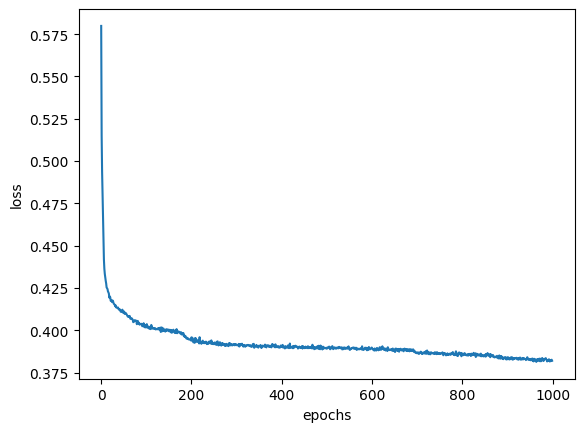

In [ ]:
# Plot the training loss over epochs
plt.plot([i for i in range(len(train_loss_list))], train_loss_list)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
# Evaluate Model Performance on Validation Data

# Disable gradient calculations for evaluation using t.no_grad()
with t.no_grad():
    # Prepare the validation data
    X = t.Tensor(X_test).type(t.float32)  # Convert validation features to a PyTorch tensor
    Y = t.Tensor(Y_test).type(t.float32)  # Convert validation labels to a PyTorch tensor

    # Calculate predictions on the validation data
    probs = forward(X)  # Pass validation data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the validation loss
    print(loss.item())

    # Now, evaluate the model on the training data
    X = t.Tensor(X_train).type(t.float32)  # Convert training features to a PyTorch tensor
    Y = t.Tensor(Y_train).type(t.float32)  # Convert training labels to a PyTorch tensor

    # Calculate predictions on the training data
    probs = forward(X)  # Pass training data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the training loss
    print(loss.item())

0.6576051115989685
0.38322004675865173


Use early stopping in Neural Networks to avoid overfitting.

In [ ]:
# Defining the parameters
number_of_input_features = 21
number_of_hidden_units = 5
epochs = 1000
learning_rate = 0.01
batch_size = 100

# Loading and preprocessing the data
X_train_tensor = t.Tensor(X_train).type(t.float32)
Y_train_tensor = t.Tensor(Y_train).type(t.float32)

X_test_tensor = t.Tensor(X_test).type(t.float32)
Y_test_tensor = t.Tensor(Y_test).type(t.float32)

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Creating a neural network model
model = Sequential(
    Linear(number_of_input_features, number_of_hidden_units),
    Tanh(),
    Linear(number_of_hidden_units, 1),
    Sigmoid()
)

# Setting up the optimizer and loss function
optimizer = Adam(model.parameters(), lr=learning_rate)
loss_fn = t.nn.BCELoss()

# Lists to store accuracy values during training
train_accuracy_list = []
validation_accuracy_list = []

# Main training loop
for epoch in range(epochs):
    # Learning rate scheduling (optional)
    if epoch % 500 == 0:
        learning_rate *= .9

    per_epoch_loss_list = []

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        probs = model(X)

        # new loss is the old loss + regularization term
        loss = loss_fn(probs.view(-1), Y)

        per_epoch_loss_list.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    with t.no_grad():
        # Calculate accuracy on train data
        model.eval()
        probs = model(X_train_tensor)
        prediction_train = (probs >= .5).type(t.LongTensor).view(-1)

        train_accuracy = (prediction_train == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_test_tensor)
        prediction_test = (probs > .5).type(t.LongTensor).view(-1)

        validation_accuracy = (prediction_test == Y_test_tensor).type(t.float32).mean().item()

        print(f'epoch {epoch}/{epochs} ---> train_accuracy : {train_accuracy} , validation_accuracy : {validation_accuracy}')
        model.train()
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

epoch 0/1000 ---> train_accuracy : 0.7850577235221863 , validation_accuracy : 0.7934268712997437
epoch 1/1000 ---> train_accuracy : 0.7951704263687134 , validation_accuracy : 0.8142223358154297
epoch 2/1000 ---> train_accuracy : 0.8002097606658936 , validation_accuracy : 0.8046607971191406
epoch 3/1000 ---> train_accuracy : 0.8024778962135315 , validation_accuracy : 0.8176397681236267
epoch 4/1000 ---> train_accuracy : 0.8024864196777344 , validation_accuracy : 0.8204755187034607
epoch 5/1000 ---> train_accuracy : 0.8045669198036194 , validation_accuracy : 0.8146222829818726
epoch 6/1000 ---> train_accuracy : 0.8041576147079468 , validation_accuracy : 0.8140042424201965
epoch 7/1000 ---> train_accuracy : 0.8045498728752136 , validation_accuracy : 0.8162582516670227
epoch 8/1000 ---> train_accuracy : 0.8025205135345459 , validation_accuracy : 0.8298916816711426
epoch 9/1000 ---> train_accuracy : 0.8014376163482666 , validation_accuracy : 0.7832109332084656
epoch 10/1000 ---> train_accur

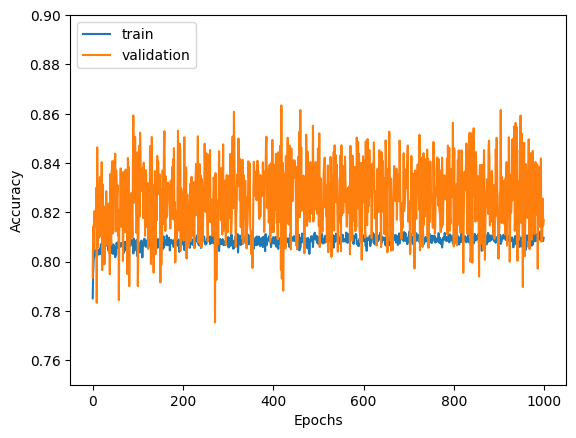

In [ ]:
# Plotting the training and validation accuracy
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label='validation')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.75, 0.9])
plt.show()

In [ ]:
# Evaluate the model
# Training set
conf_matrix = confusion_matrix(Y_train, prediction_train)
class_report = classification_report(Y_train, prediction_train)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[48927  9712]
 [12612 46027]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81     58639
           1       0.83      0.78      0.80     58639

    accuracy                           0.81    117278
   macro avg       0.81      0.81      0.81    117278
weighted avg       0.81      0.81      0.81    117278



In [ ]:
# Evaluate the model
# test set
conf_matrix = confusion_matrix(Y_test, prediction_test)
class_report = classification_report(Y_test, prediction_test)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[20946  4196]
 [  842  1522]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89     25142
           1       0.27      0.64      0.38      2364

    accuracy                           0.82     27506
   macro avg       0.61      0.74      0.63     27506
weighted avg       0.90      0.82      0.85     27506



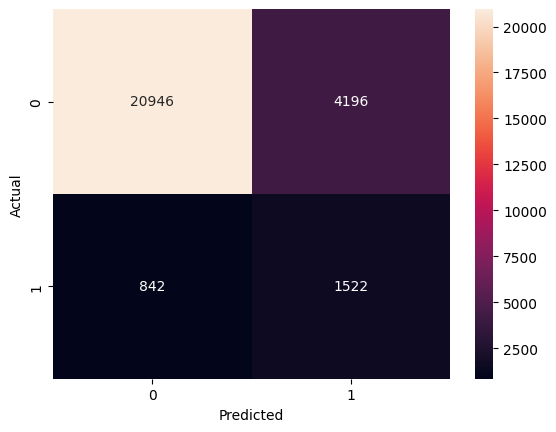

In [ ]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Use traditional techniques to predict the model.

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1','l2']}
log_reg = LogisticRegression(solver='liblinear')
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)

{'C': 100, 'penalty': 'l1'}


In [ ]:
# Use the optimal model to make predictions on the training data
y_pred = grid_search.predict(X_train)

# Evaluate the model
conf_matrix = confusion_matrix(Y_train, y_pred)
class_report = classification_report(Y_train, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[46583 12056]
 [17843 40796]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.79      0.76     58639
           1       0.77      0.70      0.73     58639

    accuracy                           0.75    117278
   macro avg       0.75      0.75      0.74    117278
weighted avg       0.75      0.75      0.74    117278



In [ ]:
# Use the optimal model to make predictions on the test data
y_pred = grid_search.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[19969  5173]
 [  744  1620]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.79      0.87     25142
           1       0.24      0.69      0.35      2364

    accuracy                           0.78     27506
   macro avg       0.60      0.74      0.61     27506
weighted avg       0.90      0.78      0.83     27506



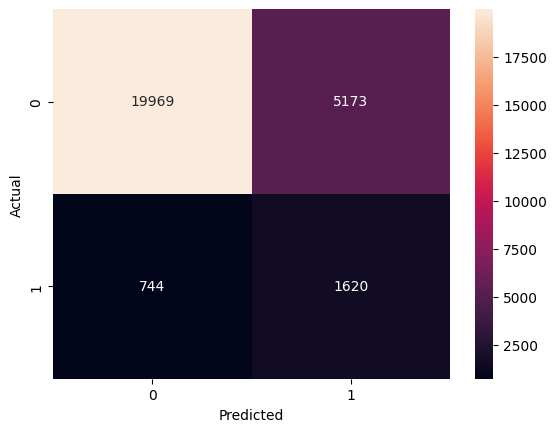

In [ ]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'binarize': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
clf = BernoulliNB(fit_prior=True, class_prior=None)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)

{'alpha': 100, 'binarize': 0.2}


In [ ]:
# Use the optimal model to make predictions on the training data
y_pred = grid_search.predict(X_train)

# Evaluate the model
conf_matrix = confusion_matrix(Y_train, y_pred)
class_report = classification_report(Y_train, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[46131 12508]
 [18252 40387]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.79      0.75     58639
           1       0.76      0.69      0.72     58639

    accuracy                           0.74    117278
   macro avg       0.74      0.74      0.74    117278
weighted avg       0.74      0.74      0.74    117278



In [ ]:
# Use the optimal model to make predictions on the test data
y_pred = grid_search.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[19803  5339]
 [  802  1562]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.79      0.87     25142
           1       0.23      0.66      0.34      2364

    accuracy                           0.78     27506
   macro avg       0.59      0.72      0.60     27506
weighted avg       0.90      0.78      0.82     27506



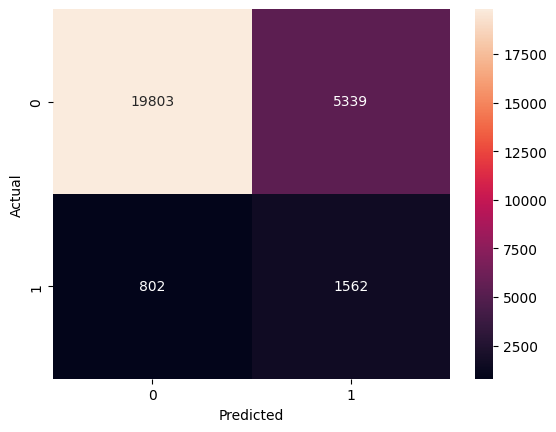

In [ ]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()